In [2]:
import pandas as pd
from extract_data import *

cat_data = get_data('data/categorised.json')


100%|██████████| 95/95 [00:02<00:00, 34.05it/s]


Attempting to visualise the tilt's of a crash and the power spectrum of the crash

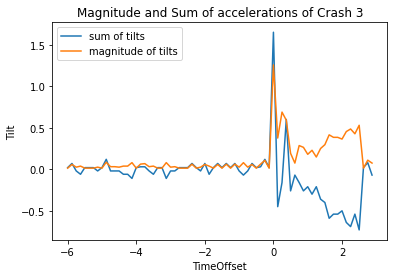

In [3]:
import matplotlib.pyplot as plt
from extract_data import *



crash_3_tilts_timeseries = get_tilt_timeseries(cat_data)[3:4]


crash_3_tilts_timeseries = calibrate_remove_z(crash_3_tilts_timeseries)
crash_3_mags=get_mags(crash_3_tilts_timeseries)
crash_3_tilts_timeseries = crash_3_tilts_timeseries[0]
crash_3_mags = crash_3_mags[0]

sum_tilts = crash_3_tilts_timeseries[:,1]+crash_3_tilts_timeseries[:,0]


plt.plot(np.linspace(-6,2.875,72),sum_tilts, label='sum of tilts') 
plt.plot(np.linspace(-6,2.875,72),crash_3_mags, label='magnitude of tilts')
plt.title('Magnitude and Sum of accelerations of Crash 3')
plt.xlabel('TimeOffset'), plt.ylabel('Tilt')
plt.legend(loc='best')








C:\Users\callu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


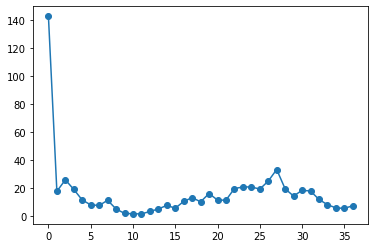

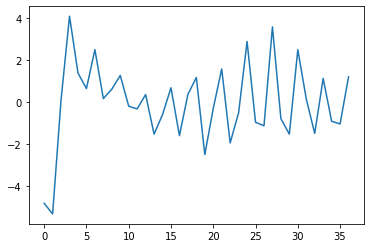

In [4]:
from numpy.fft import rfft,rfftfreq,fft
import spectrum
from spectrum import tools
import pylab


full_signal = sum_tilts
n=72 #number of data points

freqs = rfftfreq(n) 

mask= freqs >= 0 #mask for the frequency values as half are complex conjugates

fft_vals=rfft(full_signal)

plt.figure(0)
p = spectrum.speriodogram(full_signal,NFFT=72);
#p.run()
plt.plot(p,marker='o')

plt.figure(1)
plt.plot(fft_vals)


Note: it is really important to use rfft and rfftfreqs in order to find real values frequencies... the speriodogram function clearly uses real valued frequencies only

theory - If we have n frequencies above a certain threshold then we only have a certain ammount of crashs.. 

Catogrised data consists of 1-15 correct crash classifications and 16-95 incorrect crash classifications

Visualisation of both to see if this theory could be correct

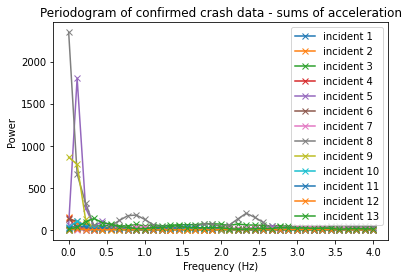

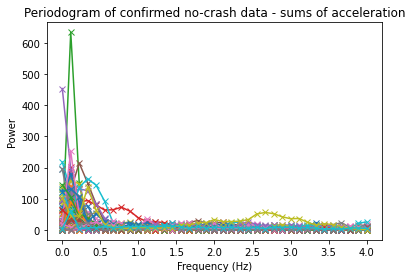

In [5]:
#plotting the fourier transforms and power spectrums of correct crashs

#function to create the plots desired
def pediogram_plot(pediogram_data,fourier_frequencies,title,figure,shift,legend):
    plt.figure(figure)
    for x in range(len(pediogram_data)):
        name = ''
        name = 'incident ' + str(shift + x)
        plt.plot(fourier_frequencies[x],pediogram_data[x],label = name,marker = 'x' )
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    if legend == 1:
        plt.legend()
    plt.show()


    


        

#initial variables for crash data
#data should be appeneded as nested lists of powers for each crash
fourier_freqs_crash = []
pediogram_data_crash = []
crash_tilt_timeseries = get_tilt_timeseries(cat_data)[0:13]
crash_tilt_timeseries = calibrate_remove_z(crash_tilt_timeseries)

#sample spacing and number of samples
N=72
s_s = 1/8


#iterating through the 14 confirmed crash cases, taking the foureir transform and pediogram of each
for crash in range(13):
    sum_tilts = []
    tilts_timeseries = []
    tilts_timeseries = crash_tilt_timeseries[crash]
    sum_tilts = tilts_timeseries[:,0]+tilts_timeseries[:,1]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(sum_tilts,NFFT=72)
    fourier_freqs_crash.append(fourier_freqs)
    pediogram_data_crash.append(pediogram_data)

#repeating for the crash data

fourier_freqs_not_crash = []
pediogram_data_not_crash = []
not_crash_tilt_timeseries = get_tilt_timeseries(cat_data)[15:95]
not_crash_tilt_timeseries = calibrate_remove_z(not_crash_tilt_timeseries)

for not_crash in range(80):
    sum_tilts = []
    tilts_timeseries = []
    tilts_timeseries = not_crash_tilt_timeseries[not_crash]
    sum_tilts = tilts_timeseries[:,0]+tilts_timeseries[:,1]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(sum_tilts,NFFT=72)
    fourier_freqs_not_crash.append(fourier_freqs)
    pediogram_data_not_crash.append(pediogram_data)

pediogram_plot(pediogram_data_crash,fourier_freqs_crash,'Periodogram of confirmed crash data - sums of acceleration',0,1,1)

pediogram_plot(pediogram_data_not_crash,fourier_freqs_not_crash,'Periodogram of confirmed no-crash data - sums of acceleration',1,15,0)




    
    



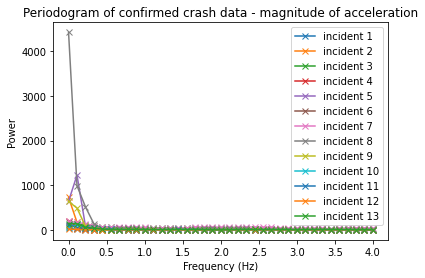

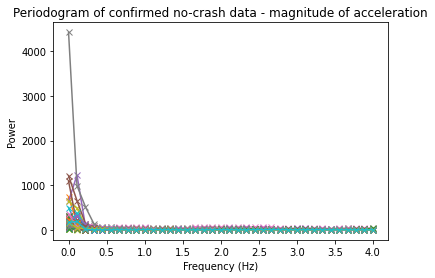

In [6]:
#repeating the above code using the magnitude of accelerations
crash_mags=get_tilt_timeseries(cat_data)[0:13]
crash_mags = calibrate_remove_z(crash_mags)
crash_mags = get_mags(crash_mags)

fourier_freqs_mags_crash = []
pediogram_data_mags_crash = []

#sample spacing and number of samples
N=72
s_s = 1/8


#iterating through the 14 confirmed crash cases, taking the foureir transform and pediogram of each
for crash in range(13):
    mags = crash_mags[crash]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(mags,NFFT=72)
    fourier_freqs_mags_crash.append(fourier_freqs)
    pediogram_data_mags_crash.append(pediogram_data)

fourier_freqs_mags_not_crash = []
pediogram_data_mags_not_crash = []
not_crash_mags=get_tilt_timeseries(cat_data)
not_crash_mags = calibrate_remove_z(not_crash_mags)
not_crash_mags = get_mags(not_crash_mags)


#repeating for the crash data and magnitudes of acceleration

for crash in range(80):
    mags = not_crash_mags[crash]
    fourier_freqs = rfftfreq(N,d=s_s)
    pediogram_data = spectrum.speriodogram(mags,NFFT=72)
    fourier_freqs_mags_not_crash.append(fourier_freqs)
    pediogram_data_mags_not_crash.append(pediogram_data)

pediogram_plot(pediogram_data_mags_crash,fourier_freqs_mags_crash,'Periodogram of confirmed crash data - magnitude of acceleration',0,1,1)

pediogram_plot(pediogram_data_mags_not_crash,fourier_freqs_mags_not_crash,'Periodogram of confirmed no-crash data - magnitude of acceleration',1,15,0)


Now to check if the data does show some kind of seperation using visualisation.. First creating a function to to take the first n largest powers and corresponding frequencies

In [20]:

#takes one incident, returns n greatest powers and their corresponding frequencies
#we assume z data has already been removed, tilts is high frequency acceleration data
#we are using sum of tilts for this function, explanation in callums notes
def periodogram_feauture_extractor(tilts, n):
    number_data_points = 72
    s_s = 1/8 #sample spacing
    sum_tilts = tilts[:,0]
    fourier_freqs = rfftfreq(number_data_points,d=s_s)
    periodogram_data = spectrum.speriodogram(sum_tilts,NFFT=number_data_points)
    sorted_periodogram_data = sorted(periodogram_data,reverse=True)
    n_largest_powers = sorted_periodogram_data[0:n]
    corresponding_frequencies = []
    for power in range(n):
        index = []
        if n_largest_powers[power] == 0:
            corresponding_frequencies.append(0) #if the power is 0 we return a frequency of 0
        else:
            #if we have multiple frequncies with the same exact powers we return the smallest frequency
            index = np.where(periodogram_data == n_largest_powers[power])
            corresponding_frequencies.append(fourier_freqs[index[0][0]])


    return n_largest_powers,corresponding_frequencies


print(periodogram_feauture_extractor(crash_tilt_timeseries[12],10))



    
    

([136.110444815581, 97.26807745551574, 84.07540948698922, 68.30840010223886, 50.95300233801791, 40.43711404702798, 39.48373319199654, 31.862266440080642, 30.61347628694173, 29.762708059661843], [0.3333333333333333, 0.2222222222222222, 0.4444444444444444, 0.5555555555555556, 1.4444444444444444, 1.3333333333333333, 0.6666666666666666, 0.1111111111111111, 2.7777777777777777, 1.1111111111111112])


Now to check this works... trying to perform pca using the first four powers for each and for the first four frequencies of each

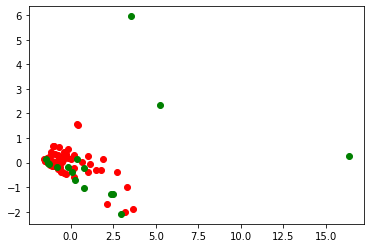

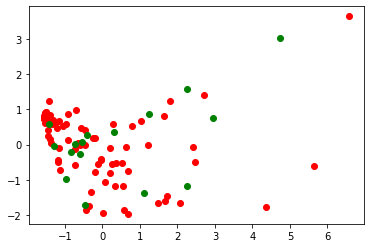

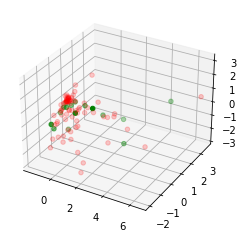

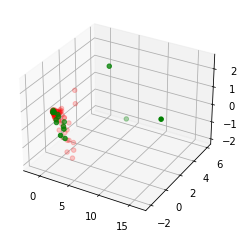

In [22]:
from sklearn.preprocessing import StandardScaler


#extracting and calibrating the data

all_tilt_timeseries = get_tilt_timeseries(cat_data)
all_tilt_timeseries = calibrate_remove_z(all_tilt_timeseries)

#get lables
labels = np.array(get_labels(cat_data))
crash_ref = labels.nonzero()
nocrash_refs = (-1*(labels-1)).nonzero()

#creating a nested list of all periodogram data
max_periodogram_vals = []
max_frequency_vals = []

for i in range(len(all_tilt_timeseries)):
    periodogram_vals, frequency_vals = periodogram_feauture_extractor(all_tilt_timeseries[i],6)
    max_periodogram_vals.append(periodogram_vals)
    max_frequency_vals.append(frequency_vals)


#scaling the periodogram data
scaler = StandardScaler()


scaled_periodogram_data = scaler.fit_transform(max_periodogram_vals)

#scaling frequency data 
scaled_frequency_data = scaler.fit_transform(max_frequency_vals)
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(scaled_periodogram_data)
periodogram_pca = pca.transform(scaled_periodogram_data)

plt.figure(0)
plt.scatter(periodogram_pca[nocrash_refs, 0], periodogram_pca[nocrash_refs, 1],color = 'red')
plt.scatter(periodogram_pca[crash_ref, 0], periodogram_pca[crash_ref, 1],color = 'green')

pca = PCA(n_components = 0.95)
pca.fit(scaled_frequency_data)
frequency_pca = pca.transform(scaled_frequency_data)

plt.figure(1)
plt.scatter(frequency_pca[nocrash_refs, 0], frequency_pca[nocrash_refs, 1],color = 'red')
plt.scatter(frequency_pca[crash_ref, 0], frequency_pca[crash_ref, 1],color = 'green')

fig = plt.figure(3)
ax = fig.add_subplot(projection='3d')
ax.scatter(frequency_pca[crash_ref, 0], frequency_pca[crash_ref, 1],frequency_pca[crash_ref, 2],color = 'green')
ax.scatter(frequency_pca[nocrash_refs, 0], frequency_pca[nocrash_refs, 1],frequency_pca[nocrash_refs, 2],color = 'red',alpha = 0.2)

fig = plt.figure(4)
ax = fig.add_subplot(projection='3d')
ax.scatter(periodogram_pca[crash_ref, 0], periodogram_pca[crash_ref, 1],periodogram_pca[crash_ref, 2],color = 'green')
ax.scatter(periodogram_pca[nocrash_refs, 0], periodogram_pca[nocrash_refs, 1],periodogram_pca[nocrash_refs, 2],color = 'red',alpha = 0.2)


plt.show()



In [23]:
#function to return four largest powers
def periodogram_feauture_extractor(tilts_no_z):
    number_data_points = 72
    s_s = 1/8 #sample spacing
    sum_tilts = tilts_no_z[:,0] + tilts_no_z[:,1]
    fourier_freqs = rfftfreq(number_data_points,d=s_s)
    periodogram_data = spectrum.speriodogram(sum_tilts,NFFT=number_data_points)
    sorted_periodogram_data = sorted(periodogram_data,reverse=True)
    largest_powers = sorted_periodogram_data[0:4]
    corresponding_frequencies = []
    for power in range(4):
        index = []
        if largest_powers[power] == 0:
            corresponding_frequencies.append(0) #if the power is 0 we return a frequency of 0
        else:
            #if we have multiple frequncies with the same exact powers we return the smallest frequency
            index = np.where(periodogram_data == largest_powers[power])
            corresponding_frequencies.append(fourier_freqs[index[0][0]])

    power_1 = largest_powers[0]
    power_2 = largest_powers[1]
    power_3 = largest_powers[2]
    power_4 = largest_powers[3]
    frequency_1 = corresponding_frequencies[0]
    frequency_2 = corresponding_frequencies[1]
    frequency_3 = corresponding_frequencies[2]
    frequency_4 = corresponding_frequencies[3]
    
    

    return power_1,power_2,power_3,power_4,frequency_1,frequency_2,frequency_3,frequency_4


print(periodogram_feauture_extractor(crash_tilt_timeseries[12]))


(136.110444815581, 97.26807745551574, 84.07540948698922, 68.30840010223886, 0.3333333333333333, 0.2222222222222222, 0.4444444444444444, 0.5555555555555556)


Checking the magnitude of tilts just incase we lose some better clustering

In [10]:
def periodogram_feauture_extractor_mags(mags, n):
    number_data_points = 72
    s_s = 1/8 #sample spacing
    fourier_freqs = rfftfreq(number_data_points,d=s_s)
    periodogram_data = spectrum.speriodogram(mags,NFFT=number_data_points)
    sorted_periodogram_data = sorted(periodogram_data,reverse=True)
    n_largest_powers = sorted_periodogram_data[0:n]
    corresponding_frequencies = []
    for power in range(n):
        index = []
        if n_largest_powers[power] == 0:
            corresponding_frequencies.append(0) #if the power is 0 we return a frequency of 0
        else:
            #if we have multiple frequncies with the same exact powers we return the smallest frequency
            index = np.where(periodogram_data == n_largest_powers[power])
            corresponding_frequencies.append(fourier_freqs[index[0][0]])


    return n_largest_powers,corresponding_frequencies




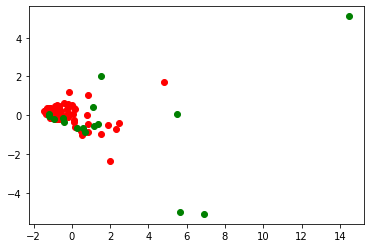

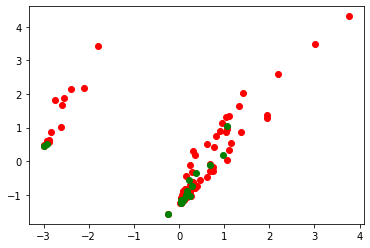

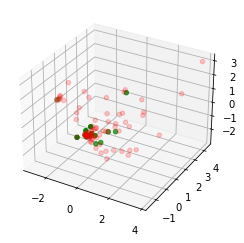

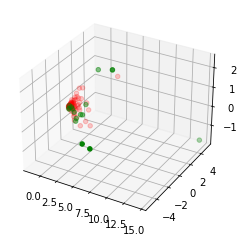

In [19]:
#extracting and calibrating the data

all_mags = get_tilt_timeseries(cat_data)
all_mags = calibrate_remove_z(all_mags)
all_mags = get_mags(all_mags)

#get lables
labels = np.array(get_labels(cat_data))
crash_ref = labels.nonzero()
nocrash_refs = (-1*(labels-1)).nonzero()

#creating a nested list of all periodogram data
max_periodogram_vals = []
max_frequency_vals = []

for i in range(len(all_tilt_timeseries)):
    periodogram_vals, frequency_vals = periodogram_feauture_extractor_mags(all_mags[i],6)
    max_periodogram_vals.append(periodogram_vals)
    max_frequency_vals.append(frequency_vals)


#scaling the periodogram data
scaler = StandardScaler()


scaled_periodogram_data = scaler.fit_transform(max_periodogram_vals)

#scaling frequency data 
scaled_frequency_data = scaler.fit_transform(max_frequency_vals)
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(scaled_periodogram_data)
periodogram_pca = pca.transform(scaled_periodogram_data)

plt.figure(0)
plt.scatter(periodogram_pca[nocrash_refs, 0], periodogram_pca[nocrash_refs, 1],color = 'red')
plt.scatter(periodogram_pca[crash_ref, 0], periodogram_pca[crash_ref, 1],color = 'green')

pca = PCA(n_components = 0.95)
pca.fit(scaled_frequency_data)
frequency_pca = pca.transform(scaled_frequency_data)

plt.figure(1)
plt.scatter(frequency_pca[nocrash_refs, 0], frequency_pca[nocrash_refs, 1],color = 'red')
plt.scatter(frequency_pca[crash_ref, 0], frequency_pca[crash_ref, 1],color = 'green')

fig = plt.figure(3)
ax = fig.add_subplot(projection='3d')
ax.scatter(frequency_pca[crash_ref, 0], frequency_pca[crash_ref, 1],frequency_pca[crash_ref, 2],color = 'green')
ax.scatter(frequency_pca[nocrash_refs, 0], frequency_pca[nocrash_refs, 1],frequency_pca[nocrash_refs, 2],color = 'red',alpha = 0.2)

fig = plt.figure(4)
ax = fig.add_subplot(projection='3d')
ax.scatter(periodogram_pca[crash_ref, 0], periodogram_pca[crash_ref, 1],periodogram_pca[crash_ref, 2],color = 'green')
ax.scatter(periodogram_pca[nocrash_refs, 0], periodogram_pca[nocrash_refs, 1],periodogram_pca[nocrash_refs, 2],color = 'red',alpha = 0.2)


plt.show()
